# Import Libraries

In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [96]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [97]:
# Read the excel file and save it into variable solar_df
solar_df = pd.read_csv('D:\Study\Year 4 Sem 1\KIA 4001 FYP\solar power.csv')
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,1/9/2008,01:00,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,1/9/2008,04:00,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,1/9/2008,07:00,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,1/9/2008,10:00,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,1/9/2008,13:00,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


# Data Understanding

In [98]:
# Get the infomation of solar dataframe
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2920 non-null   object 
 1   First Hour of Period                  2920 non-null   object 
 2   Is Daylight                           2920 non-null   bool   
 3   Distance to Solar Noon                2920 non-null   float64
 4   Average Temperature (Day)             2920 non-null   int64  
 5   Average Wind Direction (Day)          2920 non-null   int64  
 6   Average Wind Speed (Day)              2920 non-null   float64
 7   Sky Cover                             2920 non-null   int64  
 8   Visibility                            2920 non-null   float64
 9   Relative Humidity                     2920 non-null   int64  
 10  Average Wind Speed (Period)           2919 non-null   float64
 11  Average Barometri

In [99]:
# Understand the descriptive statistic of the dataframe
solar_df.describe()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [100]:
# Get the amount of NaN or null value in the dataframe
solar_df.isnull().sum()

Date                                    0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

# Exploratory Data Analysis (EDA)

In [101]:
solar_corr = solar_df.corr()

triu_index = np.triu_indices_from(solar_corr)
for row, column in zip(*triu_index):
    solar_corr.iloc[row, column] = np.NaN
    
solar_corr

,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Is Daylight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance to Solar Noon,-0.827072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Temperature (Day),0.067230,-0.145207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Wind Direction (Day),0.056284,-0.118010,0.342146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Wind Speed (Day),0.059940,-0.145073,0.096267,0.341529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sky Cover,0.028587,-0.015184,-0.230672,-0.137140,0.107793,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,-0.087069,0.065807,0.194110,0.203445,0.184778,-0.223523,NaN,NaN,NaN,NaN,NaN
Relative Humidity,-0.340942,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,NaN,NaN,NaN,NaN
Average Wind Speed (Period),0.192290,-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,NaN,NaN,NaN
Average Barometric Pressure (Period),-0.053754,0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293457,NaN,NaN


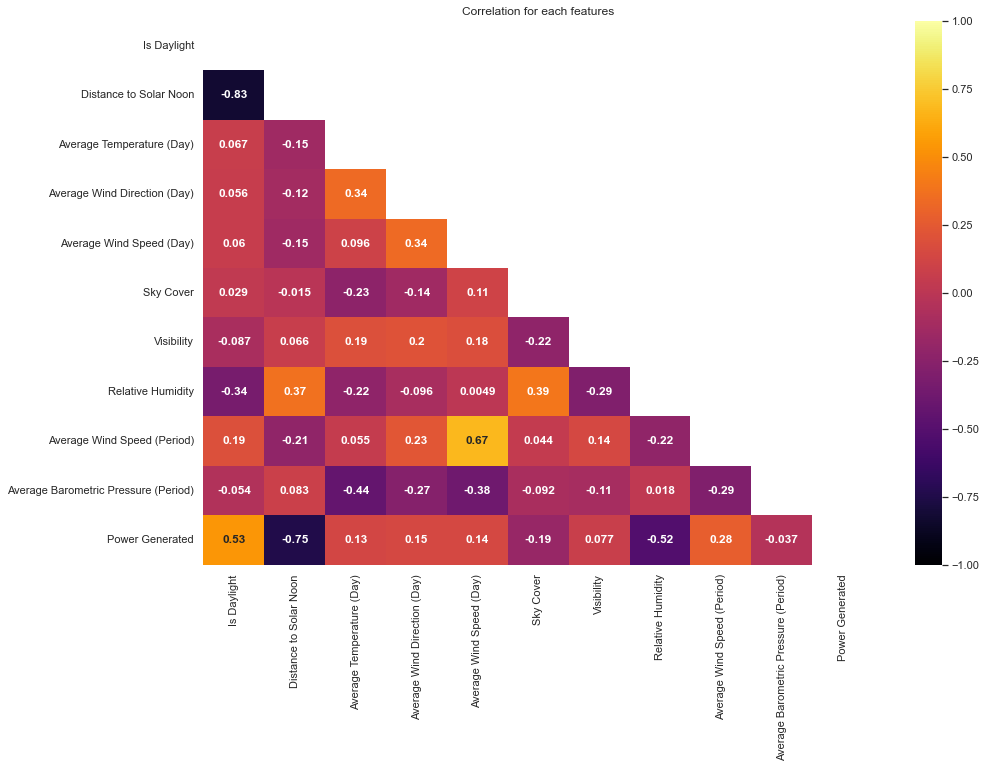

In [102]:
sns.set_context('notebook')
plt.figure(figsize=(15,10))
sns.heatmap(solar_corr, annot=True, annot_kws={'weight':'bold'}, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation for each features')
plt.show()

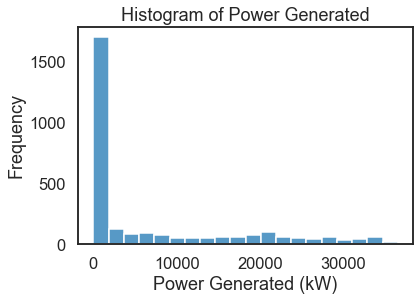

In [115]:
sns.set_style('white')
sns.set_context('talk')

# Visualize the histogram of Power Generated that binned into 20 classes.
sns.histplot(solar_df['Power Generated'], bins=20)
plt.xlabel('Power Generated (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of Power Generated')
plt.show()

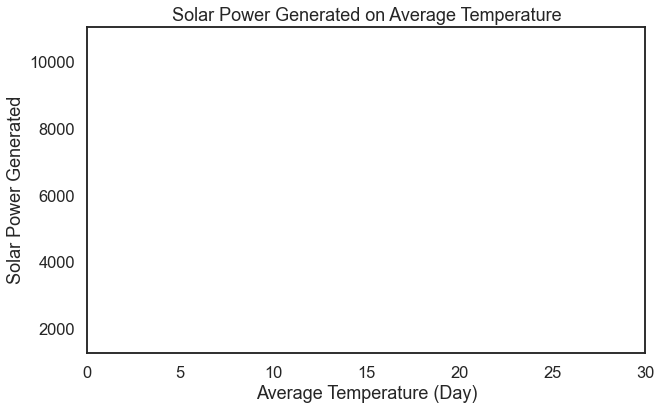

In [104]:
# Visualize the relationship of Solar Power Generated vs Average Temperature
plt.figure(figsize=(10,6))
avg_temp = solar_df.groupby('Average Temperature (Day)')['Power Generated'].mean()
avg_temp.plot(title='Solar Power Generated on Average Temperature', ylabel='Solar Power Generated')
plt.xlim(0,30)
plt.show()

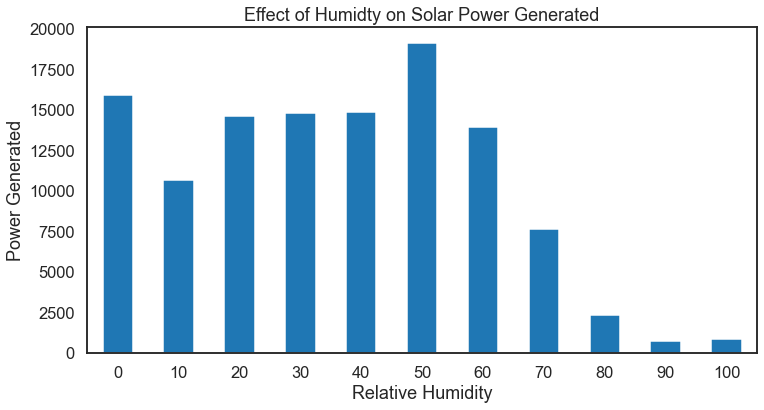

In [105]:
# Category the Relative Humidity into bins from 0 to 100.
humidity = solar_df[['Relative Humidity','Power Generated']]
humidity['Relative Humidity Category'] = pd.cut(humidity['Relative Humidity'], bins=11,
                                                labels= [n for n in range(0,110, 10)])

# Visualize the relationship of Relative Humidity and Solar Power Generated.
humidity_cat = humidity.groupby('Relative Humidity Category')['Power Generated'].mean()
humidity_cat.plot(kind='bar', x = 'Relative Humidity Category', y='Power Generated',
              title='Effect of Humidty on Solar Power Generated', ylabel='Power Generated', xlabel='Relative Humidity', 
                  xlim=(5,110), figsize=(12,6))
plt.xticks(rotation=0)
plt.show()

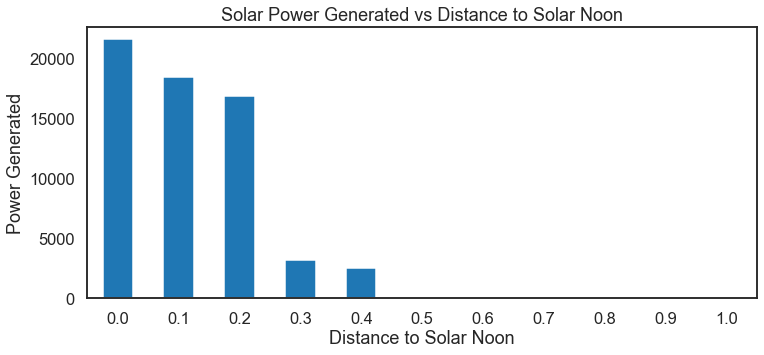

In [106]:
# Category the Distance to Solar Noon into bins from 0 to 100.

distance_noon = solar_df[['Distance to Solar Noon', 'Power Generated']]
distance_noon['Category'] = pd.cut(distance_noon['Distance to Solar Noon'], bins=11, 
                                   labels = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

# Visualize the relationship of Distance to Solar Noon and Solar Power Generated.
distance_noon_cate = distance_noon.groupby('Category')['Power Generated'].mean()
plt.figure(figsize=(12,5))
distance_noon_cate.plot(kind='bar', title='Solar Power Generated vs Distance to Solar Noon', 
                        ylabel='Power Generated', xlabel='Distance to Solar Noon')
plt.xticks(rotation=0)
plt.show()

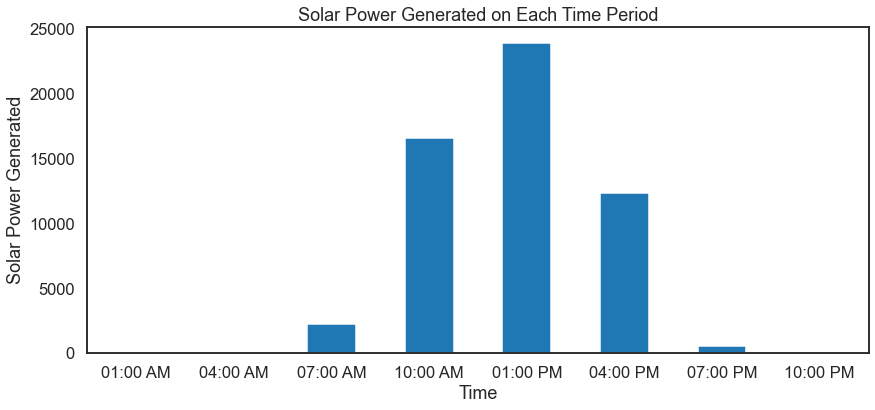

In [109]:
import datetime
# Visualize the relationship of Each Time Period and Solar Power Generated.

solar_df['First Hour of Period'] = pd.to_datetime(solar_df['First Hour of Period'], format='%H:%M').dt.time

first_hour = solar_df.groupby('First Hour of Period')['Power Generated'].mean()
first_hour_df = first_hour.reset_index()
time_12hours = []
for a in pd.to_datetime(first_hour.reset_index()['First Hour of Period'],format='%H:%M:%S'):
    time_12hours.append(a.strftime('%I:%M %p'))
    
first_hour_df['12 Hour'] = time_12hours

first_hour_df.plot(kind='bar', x = '12 Hour', y='Power Generated', xlabel='Time', ylabel='Solar Power Generated', title='Solar Power Generated on Each Time Period',
               figsize=(14,6), legend=None)
plt.xticks(rotation=0)
plt.show()

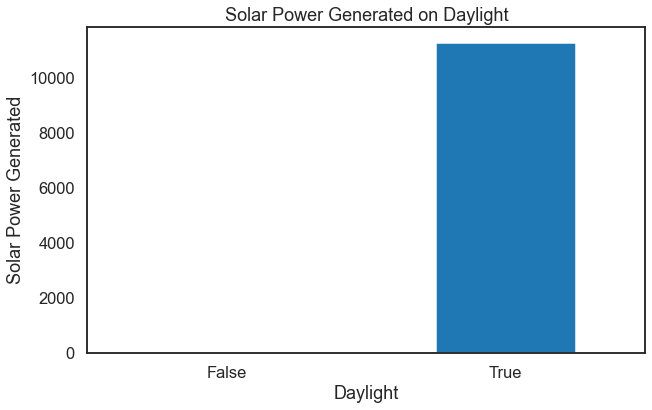

In [108]:
# Visualize that is Solar Power Generated during Daytime.
daylight = solar_df.groupby('Is Daylight')['Power Generated'].mean()
daylight.plot(kind='bar', xlabel='Daylight', ylabel='Solar Power Generated', title='Solar Power Generated on Daylight',
             figsize=(10,6))
plt.xticks([0,1], ['False', 'True'], rotation=0)
plt.show()

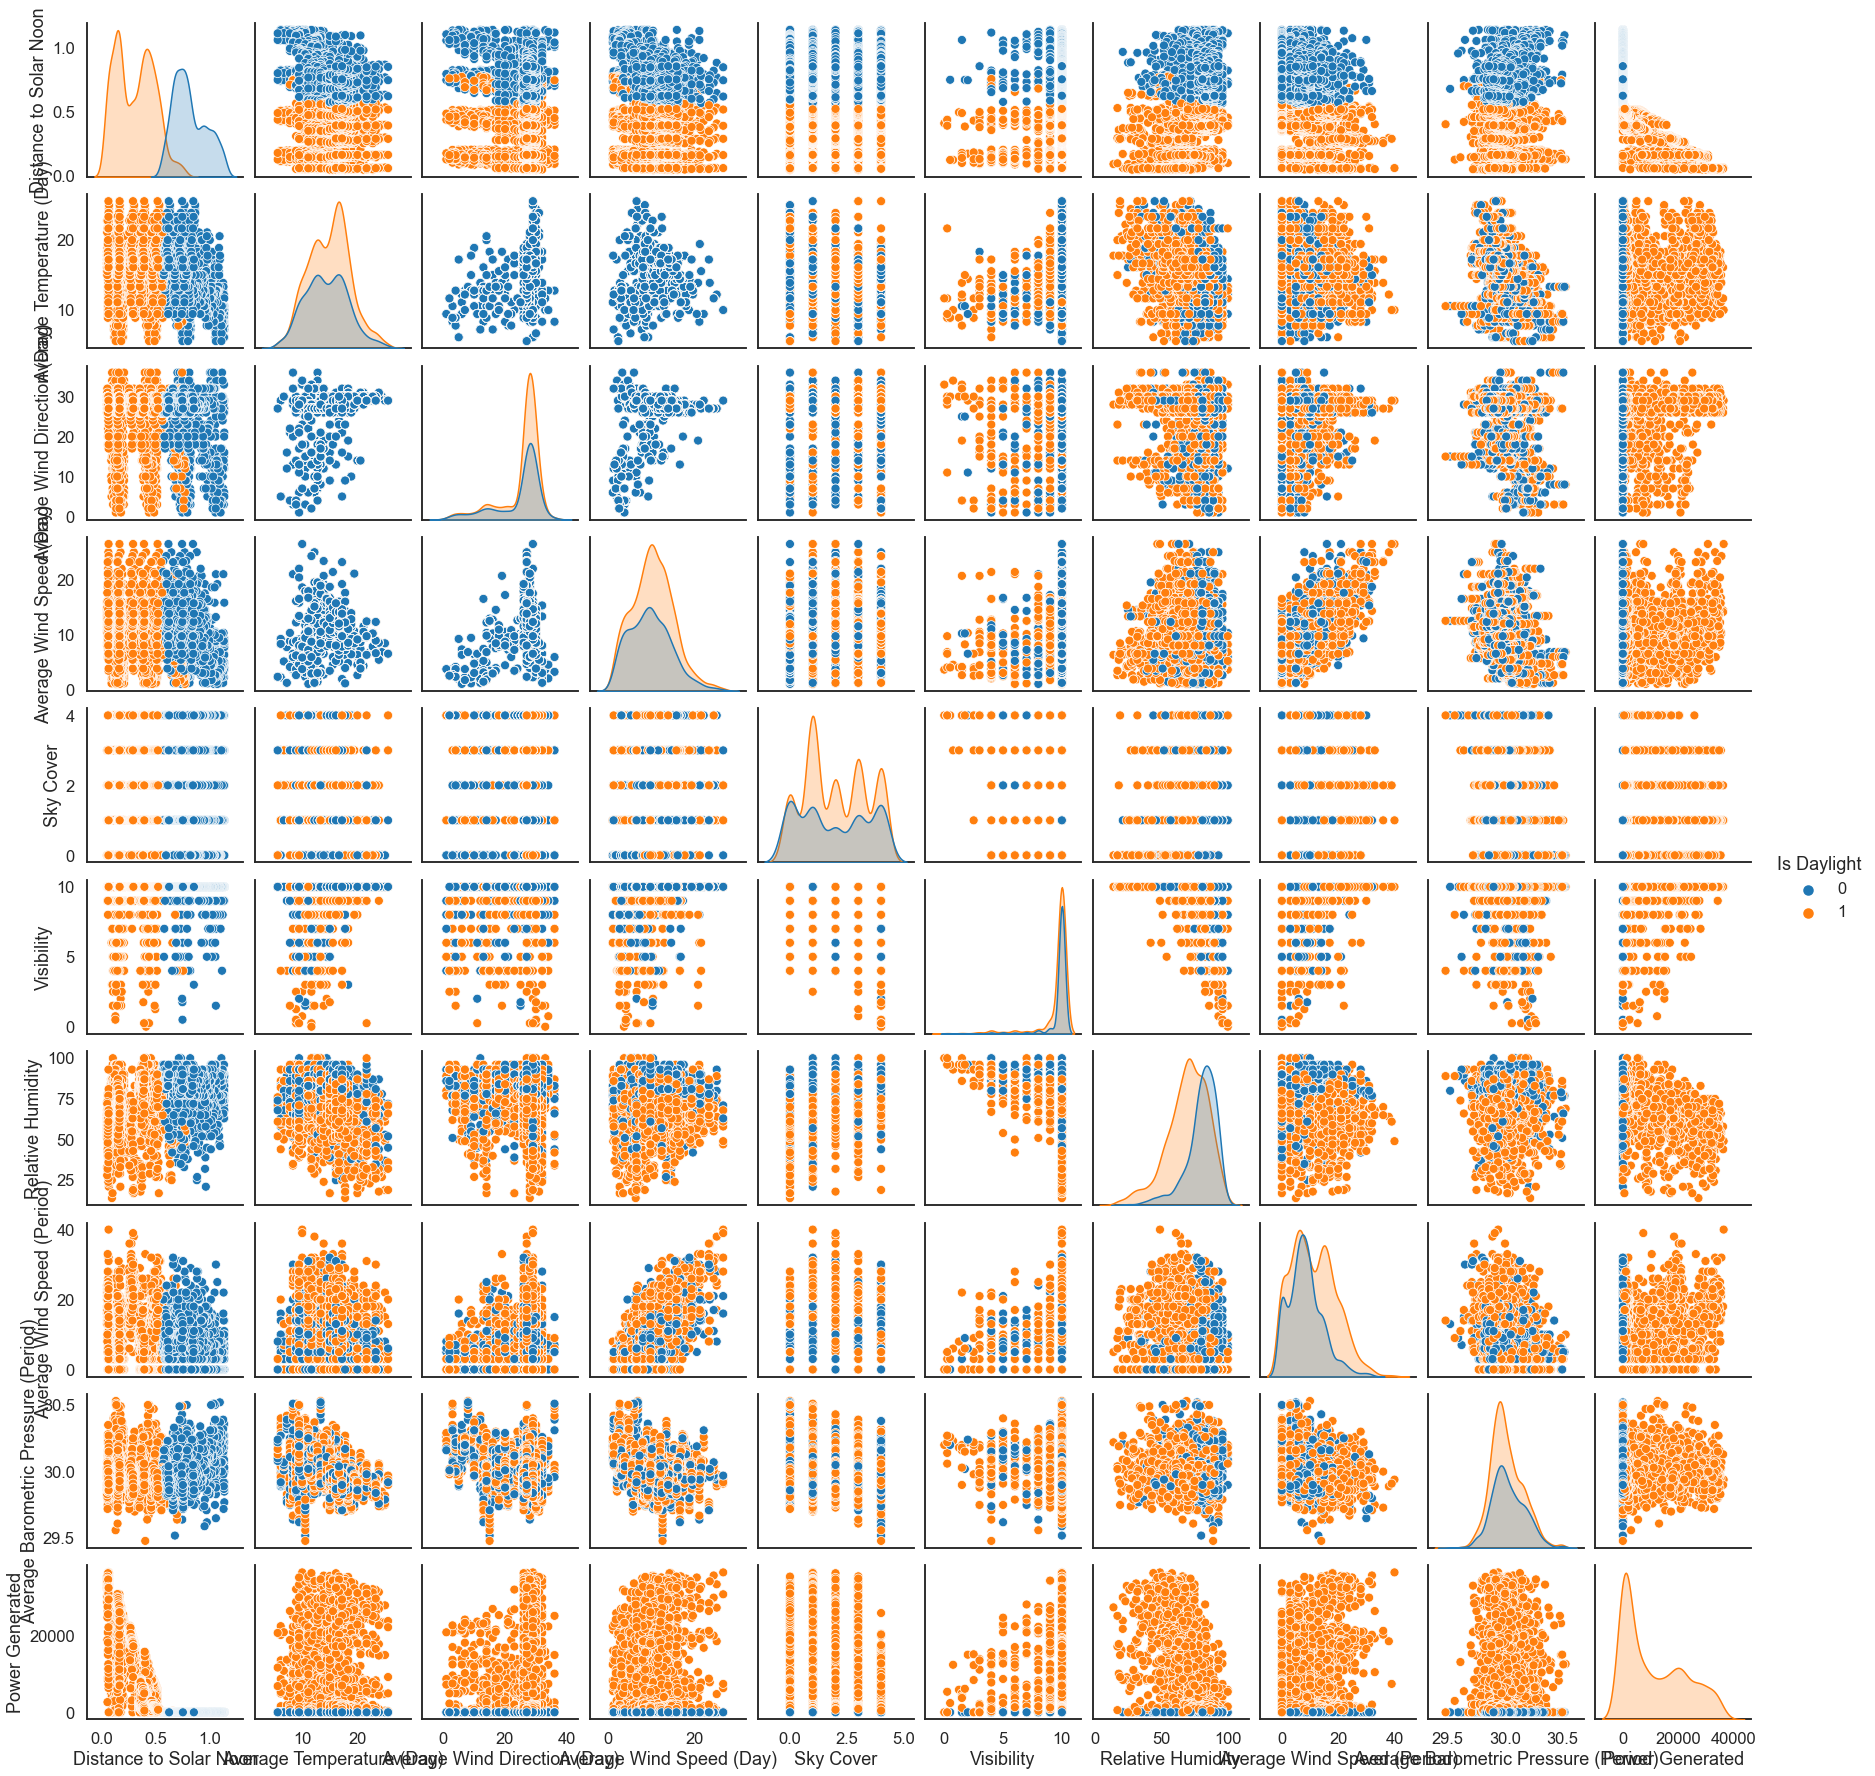

In [116]:
# Visualize the correlation of each variable.
sns.pairplot(solar_df, hue='Is Daylight')

# Data Cleaning & Preprocessing

In [111]:
# Change Date and First Hour of Period columns in datetime format
solar_df['Date'] = pd.to_datetime(solar_df['Date'], format='%d/%m/%Y')

# Fill the null values in Average Wind Speed (Period) column with its mean.
wind_mean = solar_df['Average Wind Speed (Period)'].mean()
solar_df['Average Wind Speed (Period)'] = solar_df['Average Wind Speed (Period)'].fillna(wind_mean)

# Since the column 'Average Temperature (Day) is in Fahrenheit unit, change it into Degree Celsius unit'
solar_df['Average Temperature (Day)'] = round((solar_df['Average Temperature (Day)']- 32)*(5/9), 2)

In [112]:
# Check the dataframe
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2008-09-01,01:00:00,False,0.859897,20.56,28,7.5,0,10.0,75,8.0,29.82,0
1,2008-09-01,04:00:00,False,0.628535,20.56,28,7.5,0,10.0,77,5.0,29.85,0
2,2008-09-01,07:00:00,True,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,2008-09-01,10:00:00,True,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,2008-09-01,13:00:00,True,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069


In [113]:
# Change the categorical column 'Is Daylight' into numerical column (False = 0, True = 0)
le = LabelEncoder()
solar_df['Is Daylight'] = le.fit_transform(solar_df['Is Daylight'])
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2008-09-01,01:00:00,0,0.859897,20.56,28,7.5,0,10.0,75,8.0,29.82,0
1,2008-09-01,04:00:00,0,0.628535,20.56,28,7.5,0,10.0,77,5.0,29.85,0
2,2008-09-01,07:00:00,1,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,2008-09-01,10:00:00,1,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,2008-09-01,13:00:00,1,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069


In [114]:
# Remove columns that have datetime format.
features = list(solar_df)
features.remove('Date')
features.remove('First Hour of Period')

# Columns that will be included in the machine learning models later.
features

['Is Daylight',
 'Distance to Solar Noon',
 'Average Temperature (Day)',
 'Average Wind Direction (Day)',
 'Average Wind Speed (Day)',
 'Sky Cover',
 'Visibility',
 'Relative Humidity',
 'Average Wind Speed (Period)',
 'Average Barometric Pressure (Period)',
 'Power Generated']

# Data Splitting

In [117]:
# Split the data into X (meteorological and environmental variables) and y(solar power generated).
X = solar_df[features].drop(columns='Power Generated')
y = solar_df['Power Generated']

# Split both X and y into training and testing set with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [118]:
def regression_score(model, label, xt=X_test, yt=y_test):
    table = pd.Series({'R2 score': round(r2_score(yt, model.predict(xt)), 3),
                      'RMSE': round(np.sqrt(mean_squared_error(yt, model.predict(xt))), 3),
                      'MAE':round(np.mean(abs(yt - model.predict(xt).ravel())), 3)},
                  name= label)
    return table

# Machine Learning Models

# 1 . Polynomial Regression

In [119]:
pipe_lr = Pipeline(steps=[('pr', PolynomialFeatures(degree=2, include_bias=False)),
                           ('ss', StandardScaler()),
                           ('lr', LinearRegression())])
params_lr = {'pr__degree':[2,3,4,5],
            'pr__include_bias': [True, False]}
cv_lr = GridSearchCV(pipe_lr, params_lr, cv=4)
cv_lr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'pr__degree': [2, 3, 4, 5],
                         'pr__include_bias': [True, False]})

In [120]:
poly_score = regression_score( cv_lr, 'Polynomial Regression')
poly_score

R2 score       0.847
RMSE        4015.495
MAE         2298.451
Name: Polynomial Regression, dtype: float64

# 2. Support Vector Regressor

In [121]:
pipe_svr = Pipeline(steps=[('pr',PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                          ('svr', SVR(kernel='linear', degree=2))])
params_svr = {'pr__degree':[2,3,4],
             'svr__kernel':['linear','rbf','poly'],
             'svr__degree':[2,3,4,5]}
cv_svr = GridSearchCV(pipe_svr, params_svr, cv=4)
cv_svr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('svr',
                                        SVR(degree=2, kernel='linear'))]),
             param_grid={'pr__degree': [2, 3, 4], 'svr__degree': [2, 3, 4, 5],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

In [122]:
cv_svr.best_params_

{'pr__degree': 4, 'svr__degree': 2, 'svr__kernel': 'linear'}

In [123]:
svr_score = regression_score(cv_svr, 'Support Vector Regressor')
svr_score

R2 score       0.816
RMSE        4400.032
MAE         2668.001
Name: Support Vector Regressor, dtype: float64

# 3. KNeighbors Regressor

In [124]:
pipe_knr =  Pipeline(steps=[('pr', PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                           ('knr', KNeighborsRegressor(n_neighbors=2, weights='uniform'))])
params_knr = {'pr__degree':[2,3,4,5],
             'knr__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'knr__weights':['uniform','distance']}
cv_knr = GridSearchCV(pipe_knr, params_knr, cv=4)
cv_knr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('knr',
                                        KNeighborsRegressor(n_neighbors=2))]),
             param_grid={'knr__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knr__weights': ['uniform', 'distance'],
                         'pr__degree': [2, 3, 4, 5]})

In [125]:
cv_knr.best_estimator_

Pipeline(steps=[('pr', PolynomialFeatures(degree=5)), ('ss', StandardScaler()),
                ('knr',
                 KNeighborsRegressor(n_neighbors=11, weights='distance'))])

In [126]:
knr_score = regression_score(cv_knr, 'KNeighbors Regressor')
knr_score

R2 score       0.856
RMSE        3893.412
MAE         2044.525
Name: KNeighbors Regressor, dtype: float64

# 4. Random Forest

In [127]:
rf = RandomForestRegressor(n_jobs=-1)
params_rf = {'bootstrap': [True, False],
            'max_depth': [2*n+1 for n in range(10)],
            'n_estimators': [2*n+1 for n in range(20)],
            'max_features':['auto','sqrt','log2']}
cv_rf = GridSearchCV(rf, params_rf, cv=4)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]})

In [128]:
cv_rf.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'auto',
 'n_estimators': 21}

In [129]:
rf_score = regression_score(cv_rf, 'Random Forest Regressor')
rf_score

R2 score       0.882
RMSE        3523.432
MAE         1611.161
Name: Random Forest Regressor, dtype: float64

# 5. XGBoost Regressor

In [130]:
xgb = XGBRegressor(n_jobs=-1)
params_xgb = {'n_estimators': [20*n+1 for n in range(10)],
             'learning_rate': [0.1*n+1 for n in range(10)],
             'max_depth': [n+1 for n in range(5)]}
cv_xgb = GridSearchCV(xgb, params_xgb, cv=4)
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [131]:
cv_xgb.best_params_

{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 21}

In [132]:
xgb_score = regression_score(cv_xgb, 'XGBoost Regressor')
xgb_score

R2 score       0.873
RMSE        3651.174
MAE         2068.970
Name: XGBoost Regressor, dtype: float64

# 6. Artificial Neural Network

In [133]:
mlp = MLPRegressor(hidden_layer_sizes=[100,100, 100, 100])
mlp.fit(X_train, y_train)
regression_score(mlp, 'ANN')

R2 score       0.843
RMSE        4061.245
MAE         2002.401
Name: ANN, dtype: float64

In [134]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import AUC

In [135]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(units=100, activation = 'relu', input_shape= (n_cols,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mean_squared_error'])

model.fit(X_train, y_train, epochs = 200, validation_data=(X_test, y_test), batch_size=200)


Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 155338336.0000 - accuracy: 0.0813 - mean_squared_error: 155338320.0000 - val_loss: 151954880.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 151954880.0000
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 154026080.0000 - accuracy: 8.5616e-04 - mean_squared_error: 154026080.0000 - val_loss: 149873792.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 149873792.0000
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 150700224.0000 - accuracy: 8.5616e-04 - mean_squared_error: 150700224.0000 - val_loss: 144676176.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 144676176.0000
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 142765440.0000 - accuracy: 8.5616e-04 - mean_squared_error: 142765440.0000 - val_loss: 133636264.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 133636264.0000
Epoch 5/200
12/12 [============

In [136]:
ann_score = regression_score(model, 'Artificial Neural Network')
ann_score

19/19 [==============================] - 0s 895us/step


R2 score       0.843
RMSE        4068.667
MAE         2313.218
Name: Artificial Neural Network, dtype: float64

# Overall Score

In [137]:
df_score = pd.concat([poly_score, knr_score, svr_score, rf_score, xgb_score, ann_score], axis=1).T
df_score

,R2 score,RMSE,MAE
Polynomial Regression,0.847,4015.495,2298.451
KNeighbors Regressor,0.856,3893.412,2044.525
Support Vector Regressor,0.816,4400.032,2668.001
Random Forest Regressor,0.882,3523.432,1611.161
XGBoost Regressor,0.873,3651.174,2068.970
Artificial Neural Network,0.843,4068.667,2313.218
